# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this [link](https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/EhWeqeQsh-9Mr1fneZc9_0sBOBzEdXngvxFJtAlIa-eAgA?e=8ukWwa). Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following [link](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ).

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

Machine Learning is an appropriate solution for this problem because the goal is to **predict the likelihood of flight delays** based on various features such as weather conditions, airline, origin, destination, and time-related variables. These factors have complex, non-linear relationships that are difficult to model using traditional rule-based or statistical approaches.

By training an ML model on historical flight and weather data, the system can **learn hidden patterns** and **generate probabilistic predictions** for future delays. This enables the travel booking platform to provide **real-time, data-driven insights** to customers when they book flights.

**Reasons ML is suitable:**
- The dataset is large, diverse, and contains both numerical and categorical features—ideal for supervised learning.
- Flight delays are influenced by multiple interdependent variables (e.g., weather, time, carrier), which ML models can capture more effectively than linear models.
- Predictive ML models can continuously improve as more data becomes available.
- Deploying ML predictions enhances **customer experience** and **operational decision-making** for airlines and travel platforms.

**Conclusion:**  
Since the objective is to predict a categorical outcome (“delayed” vs “on time”) using historical data with multiple features, a **supervised classification ML approach** is the most appropriate solution to deploy.


### 2. Formulate the business problem, success metrics, and desired ML output.

#### **Business Problem**
The travel booking company wants to **improve customer experience** by informing passengers about the likelihood of **flight delays** before they book tickets.  
Delays cause dissatisfaction, missed connections, and operational inefficiencies.  
By using historical flight and weather data, the company can **predict flight delay probabilities** and display these insights to customers in real time.

In short:  
> **How can we predict whether a scheduled flight will be delayed based on historical flight and weather data?**

This predictive service can help:
- Passengers make better travel decisions.
- Airlines and airports plan resources more efficiently.
- The company build customer trust by offering transparent, data-driven insights.

---

#### **Success Metrics**
To evaluate the model’s performance and business impact, both **technical** and **business-level metrics** are defined:

**Technical success metrics**
- **Accuracy** – Overall proportion of correct predictions.  
- **Precision** – How many flights predicted as “delayed” were actually delayed (important to avoid false alarms).  
- **Recall (Sensitivity)** – How many of the actual delayed flights were correctly identified (important to alert customers).  
- **F1-Score** – Balance between precision and recall for imbalanced classes.  
- **ROC-AUC** – Measures the model’s ability to distinguish between delayed and on-time flights.

**Business success metrics**
- Reduced number of customer complaints due to unexpected delays.
- Increased customer engagement with delay prediction feature.
- Improved rebooking efficiency and customer satisfaction ratings.

---

#### **Desired ML Output**
- **Output Type:** A **binary classification** (1 = Delayed, 0 = On Time).  
- **Model Prediction:** Probability score (e.g., “This flight has a 70% chance of being delayed”).  
- **Operational Use:** Integrate the model into the booking system or flight status API to display delay likelihood in real-time to customers.

---

**Conclusion:**  
The business goal is to deploy a supervised ML model that reliably predicts flight delays.  
Success will be measured by both model accuracy and its contribution to improving customer satisfaction and operational efficiency.


### 3. Identify the type of ML problem you’re dealing with.

The task of predicting whether a flight will be delayed or on time is a **supervised machine learning problem**, specifically a **binary classification** problem.

#### **Justification**
- The dataset contains **labeled historical data**, where each record includes flight and weather information along with a **target label** indicating whether the flight was delayed (`1`) or on time (`0`).
- The model will learn from these labeled examples to identify patterns and relationships between **input features** (such as departure time, origin, destination, airline, temperature, etc.) and the **target output** (delay status).
- Once trained, the model can generalize to unseen flight data and **predict the likelihood of delay** for future flights.

#### **Key Characteristics**
| Aspect | Description |
|--------|--------------|
| **Learning Type** | Supervised Learning |
| **Problem Type** | Classification |
| **Number of Classes** | Binary (Delayed / On-Time) |
| **Goal** | Predict if a given flight will be delayed based on its features |
| **Common Algorithms** | Logistic Regression, Decision Tree, Random Forest, XGBoost, SVM |

#### **Conclusion**
Since the output variable (delay status) is categorical with two possible outcomes, this project is a **supervised binary classification problem** aimed at predicting flight delays using historical flight and weather data.

**Recommended Machine Learning Techniques:**

1. **Logistic Regression**  
   - Provides a strong baseline for binary classification.  
   - Interpretable model with coefficients showing feature impact on delay probability.

2. **Decision Tree / Random Forest**  
   - Handles non-linear relationships and feature interactions well.  
   - Works effectively with mixed feature types (categorical + numerical).  
   - Random Forest reduces overfitting by combining multiple trees.

3. **Gradient Boosting (e.g., XGBoost, LightGBM)**  
   - Provides high accuracy for structured data like this.  
   - Efficient with large datasets and captures complex patterns.  
   - Commonly used in Kaggle competitions for tabular classification problems.

**Technique Selection Justification:**  
For this project, a **Random Forest Classifier** or **XGBoost Classifier** is the most appropriate choice. Both methods can efficiently handle large datasets, manage missing data, and capture non-linear relationships without requiring extensive preprocessing.  
Additionally, they provide **feature importance scores**, which help explain which factors most influence flight delays.

**Conclusion:**  
A **supervised classification approach** using ensemble methods (Random Forest or XGBoost) is the most suitable ML technique for predicting flight delays based on historical flight and weather data.



### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [1]:
# --- Core Libraries ---
import os
from pathlib import Path
from zipfile import ZipFile
import time

# --- Data Handling ---
import pandas as pd
import numpy as np

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# --- Machine Learning ---
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# --- ML Models ---
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# --- Utility ---
import warnings
warnings.filterwarnings('ignore')

# --- Notebook Display Settings ---
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [2]:
# download the files

# <note: make them all relative, absolute path is not accepted>
import os
import pandas as pd
import numpy as np
import zipfile
import glob
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# --- Define relative paths ---
base_path = './data_project'              # project data folder (relative)
csv_base_path = f'{base_path}/csv_files'  # extracted CSVs folder
zip_path = 'data_compressed.zip'          # zip file in same folder as notebook

# --- Create folders (if they don't exist) ---
os.makedirs(csv_base_path, exist_ok=True)

# --- Extract the zip file ---
print("Extracting files... please wait.")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(csv_base_path)
print(f" Files extracted to: {csv_base_path}")

# --- List extracted files ---
csv_files = glob.glob(f"{csv_base_path}/*.csv")
print(f"Number of CSV files found: {len(csv_files)}")

# --- Load first CSV to inspect ---
if len(csv_files) > 0:
    df = pd.read_csv(csv_files[0])
    print("Loaded file:", csv_files[0])
    display(df.head())
else:
    print(" No CSV files found in extracted folder.")

Extracting files... please wait.
✅ Files extracted to: ./data_project/csv_files
Number of CSV files found: 0
⚠️ No CSV files found in extracted folder.


In [3]:
# How many zip files do we have? write a code to answer it.
import glob

inner_zip_files = glob.glob(f"{csv_base_path}/**/*.zip", recursive=True)

print(f"Number of inner ZIP files found: {len(inner_zip_files)}")

# Show the first few files to confirm
inner_zip_files[:10]

Number of inner ZIP files found: 60


['./data_project/csv_files\\data_compressed\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip',
 './data_project/csv_files\\data_compressed\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip',
 './data_project/csv_files\\data_compressed\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip',
 './data_project/csv_files\\data_compressed\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip',
 './data_project/csv_files\\data_compressed\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip',
 './data_project/csv_files\\data_compressed\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip',
 './data_project/csv_files\\data_compressed\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip',
 './data_project/csv_files\\data_compressed\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip',
 './data_project/csv_files\\data_compressed\\On_Time_Reportin

#### Extract CSV files from ZIP files

In [4]:
from zipfile import ZipFile
import glob
import os

# --- Find all inner zip files recursively ---
inner_zip_files = glob.glob(f"{csv_base_path}/**/*.zip", recursive=True)
print(f"Number of inner ZIP files found: {len(inner_zip_files)}")

# --- Function to extract CSVs ---
def zip2csv(zipFile_name, file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """
    try:
        with ZipFile(zipFile_name, 'r') as z:
            print(f'Extracting {os.path.basename(zipFile_name)}')
            z.extractall(path=file_path)
    except Exception as e:
        print(f'zip2csv failed for {zipFile_name}: {e}')

# --- Create a folder for all extracted CSVs ---
all_csv_path = f'{base_path}/all_csvs'
os.makedirs(all_csv_path, exist_ok=True)

# --- Extract all monthly zip files ---
for file in inner_zip_files:
    zip2csv(file, all_csv_path)

print("\n All inner ZIP files extracted successfully!")
print(f"CSV files are now in: {all_csv_path}")

Number of inner ZIP files found: 60
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_8.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_

In [5]:
# How many csv files have we extracted? write a code to answer it.
import glob

# Path to the folder containing all extracted CSV files
csv_files = glob.glob(f"{all_csv_path}/*.csv")

# Display how many CSVs were extracted
print(f"Number of CSV files extracted: {len(csv_files)}")

# Show first few file names to confirm
csv_files[:10]

Number of CSV files extracted: 60


['./data_project/all_csvs\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv',
 './data_project/all_csvs\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_10.csv',
 './data_project/all_csvs\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_11.csv',
 './data_project/all_csvs\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv',
 './data_project/all_csvs\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_2.csv',
 './data_project/all_csvs\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_3.csv',
 './data_project/all_csvs\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_4.csv',
 './data_project/all_csvs\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_5.csv',
 './data_project/all_csvs\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_6.csv',
 './data_project/all_csvs\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_

Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [6]:
from IPython.display import IFrame
import os, glob

# Recursively search for the readme.html file inside csv_base_path
readme_files = glob.glob(os.path.join(csv_base_path, '**', 'readme.html'), recursive=True)

if readme_files:
    readme_path = readme_files[0]
    print(f" Found readme file at: {readme_path}")
    IFrame(src=os.path.relpath(readme_path), width=1000, height=600)
else:
    print(" readme.html not found in extracted folders. It might be inside one of the inner ZIP files.")
# If the output says it’s missing, that’s because readme.html is often packed inside each monthly ZIP file rather than the main one. 
# So let's look inside that.
from zipfile import ZipFile

# Extract just one monthly ZIP to a temporary folder to inspect
test_zip = inner_zip_files[0]
test_extract_path = f'{base_path}/temp_readme_check'
os.makedirs(test_extract_path, exist_ok=True)

with ZipFile(test_zip, 'r') as z:
    z.extractall(test_extract_path)

# Now search for HTML inside that temp folder
html_files = glob.glob(f"{test_extract_path}/**/*.html", recursive=True)
print("HTML files found:", html_files)

#Now read the html file
from IPython.display import IFrame
import os

readme_path = './data_project/temp_readme_check/readme.html'
IFrame(src=os.path.relpath(readme_path), width=1000, height=600)

⚠️ readme.html not found in extracted folders. It might be inside one of the inner ZIP files.
HTML files found: ['./data_project/temp_readme_check\\readme.html']


#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [8]:
# Step: Load the September 2018 CSV file
# Before combining all the CSV files, get a sense of the data from a single CSV file.
# Using Pandas, read the On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv file first.

import os
import pandas as pd

# Automatically detect the notebook's current directory
base_path = os.getcwd()

# Build the path to your CSV file dynamically (universal path)
sample_csv = os.path.join(base_path, "data_project", "all_csvs",
                          "On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv")

# Read the CSV file using pandas read_csv
df_temp = pd.read_csv(sample_csv, low_memory=False)

# Print confirmation and preview
print("File successfully loaded!")
print(f" Loaded from: {sample_csv}")
print(f"Shape: {df_temp.shape}")

# Display first few rows and dataset information
display(df_temp.head())
df_temp.info()

✅ File successfully loaded!
📂 Loaded from: C:\Users\prena\Downloads\data_project\all_csvs\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv
Shape: (585749, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585749 entries, 0 to 585748
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(70), int64(21), object(19)
memory usage: 491.6+ MB


**Question**: Print the row and column length in the dataset, and print the column names.

In [9]:
# Confirm exact row and column count
df_shape = df_temp.shape
print(f"Rows and columns in one CSV file: {df_shape}")

# Print all column names
print("\nThe column names are:")
for col in df_temp.columns:
    print(col)

Rows and columns in one CSV file: (585749, 110)

The column names are:
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1Airpor

**Question**: Print the first 10 rows of the dataset.  

In [17]:
# Print the first 10 rows of the dataset
print("First 10 rows of the dataset:\n")
df_temp.head(10)

First 10 rows of the dataset:



,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,3,9,16,7,2018-09-16,9E,20363,9E,N316PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,3,9,17,1,2018-09-17,9E,20363,9E,N916XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,3,9,20,4,2018-09-20,9E,20363,9E,N371CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,3,9,21,5,2018-09-21,9E,20363,9E,N601LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,3,9,23,7,2018-09-23,9E,20363,9E,N906XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [19]:
print('The column names are:')
for col in df_temp.columns:
    print(col)

The column names are:
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1TotalGTime


**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [10]:
# Print all columns in the dataset that contain the word 'Del'
del_columns = [col for col in df_temp.columns if 'Del' in col]
print("Columns containing 'Del':")
print(del_columns)

Columns containing 'Del':
['DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DivArrDelay']


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [13]:
print("The #rows and #columns are", df_temp.shape[0], "and", df_temp.shape[1], "\n")

print("The years in this dataset are:", df_temp['Year'].unique(), "\n")

print("The months covered in this dataset are:", df_temp['Month'].unique(), "\n")

print("The date range for data is:", min(df_temp['FlightDate']), "to", max(df_temp['FlightDate']), "\n")

print("The airlines covered in this dataset are:", list(df_temp['Reporting_Airline'].unique()), "\n")

print("The Origin airports covered are:", list(df_temp['Origin'].unique()), "\n")

print("The Destination airports covered are:", list(df_temp['Dest'].unique()), "\n")



The #rows and #columns are 585749 and 110 

The years in this dataset are: [2018] 

The months covered in this dataset are: [9] 

The date range for data is: 2018-09-01 to 2018-09-30 

The airlines covered in this dataset are: ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO'] 

The Origin airports covered are: ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [14]:
# Create a DataFrame showing the count of Origin and Destination airports
counts = pd.DataFrame({
    'Origin': df_temp['Origin'].value_counts(),
    'Destination': df_temp['Dest'].value_counts()
})

# Display the combined counts
counts

,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [15]:
counts.sort_values(by='Origin', ascending=False).head(15)


,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

###  Given all the information about a flight trip, can you predict if it would be delayed?
Yes, we can. Since we have detailed information about each flight — such as the airline, departure and arrival times, airports, distance, and even weather-related conditions — it’s possible to use this data to predict whether a flight will be delayed.

This problem fits really well into a supervised machine learning setup because we already know the outcomes for past flights (whether they were delayed or on time). By learning from these historical examples, a model can identify the patterns and factors that most often lead to delays.

In simple terms, the model will look at all the available flight information (the input features) and try to predict a label — “Delayed” (1) or “On Time” (0).

Since there are only two possible outcomes, this is a binary classification problem.
Some of the algorithms that can be used for this kind of task include Logistic Regression, Decision Trees, Random Forests, and XGBoost, all of which are good at finding patterns in large, complex datasets.

Machine learning is especially useful here because flight delays depend on many interacting factors — time of day, airport congestion, airline operations, and even weather — which are difficult to model with simple rules.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

If I were traveling from San Francisco (SFO) to Los Angeles (LAX) on a work trip, I’d only have access to the information that’s known before the flight actually departs.
That means I could know things like the scheduled date and time, the airline, and the route, but not details that depend on the flight’s progress or outcome (like ArrDelay, CarrierDelay, or LateAircraftDelay).

So, from the given list of columns, the ones that I would realistically know before boarding are:Year, Quarter, Month, DayofMonth, DayOfWeek, FlightDate,
Reporting_Airline, Origin, OriginState, Dest, DestState, CRSDepTime, Cancelled, Diverted, Distance, DistanceGroup
However, columns like DepDelayMinutes, DepartureDelayGroups, ArrDelay, ArrDelayMinutes, ArrDel15, and AirTime are only known after the flight departs or lands, so they can’t be used if the goal is to predict delays in advance.

In short, I’d have around 16 features available before the flight — all the planned and static details — and the rest would become available after the flight starts or finishes.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [17]:
import os
import glob
import pandas as pd

def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one DataFrame.
    csv_files: list[str] - paths to CSV files
    filter_cols: list[str] - columns to keep
    subset_cols: list[str] - columns to filter rows on
    subset_vals: list[list[str]] - allowed values per subset column (same order as subset_cols)
    file_name: str - relative path to save the combined CSV
    """
    # Create an empty dataframe
    df = pd.DataFrame(columns=filter_cols)

    parts = []
    for i, fp in enumerate(csv_files, 1):
        try:
            tmp = pd.read_csv(fp, low_memory=False)

            # Keep only requested columns that exist in this file
            keep = [c for c in filter_cols if c in tmp.columns]
            tmp = tmp[keep]

            # Apply row subsetting via .isin for each subset column
            for col, allowed in zip(subset_cols, subset_vals):
                if col in tmp.columns:
                    tmp = tmp[tmp[col].isin(allowed)]

            parts.append(tmp)

            if i % 5 == 0 or i == len(csv_files):
                print(f"Processed {i}/{len(csv_files)} files. "
                      f"Current rows: {sum(len(p) for p in parts)}")
        except Exception as e:
            print(f" Skipped {fp} due to error: {e}")

    # Concatenate all parts (if any), else return the empty skeleton
    combined = pd.concat(parts, ignore_index=True) if parts else df

    # Ensure output directory exists (relative path)
    out_dir = os.path.dirname(file_name)
    if out_dir and not os.path.exists(out_dir):
        os.makedirs(out_dir, exist_ok=True)

    # Save combined CSV
    combined.to_csv(file_name, index=False)
    print(f"✅ Done! Combined shape: {combined.shape}. Saved to: {file_name}")

    return combined

# Example usage (relative paths):
# csv_files = glob.glob(os.path.join("data_project", "all_csvs", "*.csv"))
# df_all = combine_csv(csv_files, cols, subset_cols, subset_vals,
#                      os.path.join("data_project", "combined_filtered.csv"))


In [18]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [20]:
import os, glob, time

start = time.time()

# base_path should already be set to os.getcwd() (your Downloads folder)
# We'll search in data_project/all_csvs and also fall back to a recursive search.
candidate_patterns = [
    os.path.join(base_path, "data_project", "all_csvs", "*.csv"),
    os.path.join(base_path, "data_project", "all_csvs", "*.CSV"),
    # Fallback: recursive search for the BTS monthly files anywhere under base_path
    os.path.join(base_path, "**", "On_Time_Reporting_Carrier_On_Time_Performance*.csv"),
]

csv_files = []
for pat in candidate_patterns:
    csv_files.extend(glob.glob(pat, recursive=True))

# Deduplicate while preserving order
csv_files = list(dict.fromkeys(csv_files))

print(f"Found {len(csv_files)} CSV files to combine.")
if csv_files[:5]:
    print("Sample files:\n - " + "\n - ".join(csv_files[:5]))

# Output path (keep things organized inside data_project/)
combined_csv_filename = os.path.join(base_path, "data_project", "combined_files.csv")

# Call your combine function
df_all = combine_csv(
    csv_files=csv_files,
    filter_cols=cols,            # your list of 20 columns from earlier
    subset_cols=subset_cols,     # ['Origin','Dest','Reporting_Airline']
    subset_vals=subset_vals,     # top airports + top 5 airlines
    file_name=combined_csv_filename
)

elapsed = round((time.time() - start) / 60, 2)
print(f"\ncsv's merged in {elapsed} minutes")
print("Combined file saved to:", combined_csv_filename)
print("Combined shape:", df_all.shape)



Found 61 CSV files to combine.
Sample files:
 - C:\Users\prena\Downloads\data_project\all_csvs\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv
 - C:\Users\prena\Downloads\data_project\all_csvs\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_10.csv
 - C:\Users\prena\Downloads\data_project\all_csvs\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_11.csv
 - C:\Users\prena\Downloads\data_project\all_csvs\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv
 - C:\Users\prena\Downloads\data_project\all_csvs\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_2.csv
Processed 5/61 files. Current rows: 114913
Processed 10/61 files. Current rows: 232864
Processed 15/61 files. Current rows: 364001
Processed 20/61 files. Current rows: 487663
Processed 25/61 files. Current rows: 633337
Processed 30/61 files. Current rows: 779914
Processed 35/61 files. Current rows: 937123
Processed 40/61 files. Current rows

#### Load dataset

Load the combined dataset.

In [21]:
import pandas as pd

# Load the combined CSV file
data = pd.read_csv(f"{base_path}/data_project/combined_files.csv")

print("Combined dataset successfully loaded!")
print(f"Shape: {data.shape}")
display(data.head())


✅ Combined dataset successfully loaded!
Shape: (1680401, 20)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


Print the first 5 records.

In [22]:
# Print the first 5 records
print("First 5 records of the combined dataset:\n")
data.head()

First 5 records of the combined dataset:



,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [23]:
# Explore dataset summary
print("The #rows and #columns are ", data.shape[0], " and ", data.shape[1])
print()

print("The years in this dataset are: ", sorted(data['Year'].unique()))
print()

print("The months covered in this dataset are: ", sorted(data['Month'].unique()))
print()

print("The date range for data is:", data['FlightDate'].min(), "to", data['FlightDate'].max())
print()

print("The airlines covered in this dataset are:", sorted(data['Reporting_Airline'].unique()))
print()

print("The Origin airports covered are:", sorted(data['Origin'].unique()))
print()

print("The Destination airports covered are:", sorted(data['Dest'].unique()))

The #rows and #columns are  1680401  and  20

The years in this dataset are:  [2014, 2015, 2016, 2017, 2018]

The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

The date range for data is: 2014-01-01 to 2018-12-31

The airlines covered in this dataset are: ['AA', 'DL', 'OO', 'UA', 'WN']

The Origin airports covered are: ['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAX', 'ORD', 'PHX', 'SFO']

The Destination airports covered are: ['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAX', 'ORD', 'PHX', 'SFO']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [24]:
# Rename the target column
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)

# Verify the change
print(" Column renamed successfully!")
print("Columns now include:", list(data.columns))

✅ Column renamed successfully!
Columns now include: ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState', 'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime']


Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [27]:
# Check for missing (null) values in each column
null_counts = data.isnull().sum(axis=0)

# Display the columns that have missing values
print("Null values across columns:\n")
print(null_counts) 

Null values across columns:

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             23382
ArrDelayMinutes      23382
is_delay             23382
AirTime              23382
dtype: int64


The arrival delay details and airtime are missing for 23382 out of 1680401 rows, which is 1.39%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [28]:
### Remove null columns
# Keep only rows where ArrDelay is not null
data = data[~data['ArrDelay'].isnull()]

print(" Cleaned dataset shape:", data.shape)
print(" Rows removed:", 1680401 - data.shape[0])

✅ Cleaned dataset shape: (1657019, 20)
🗑️ Rows removed: 23382


Get the hour of the day in 24-hour time format from CRSDepTime.

In [29]:
# Convert CRSDepTime (e.g., 945, 2145) into hour of the day in 24-hour format
data['DepHourofDay'] = data['CRSDepTime'].apply(lambda x: int(x // 100))

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

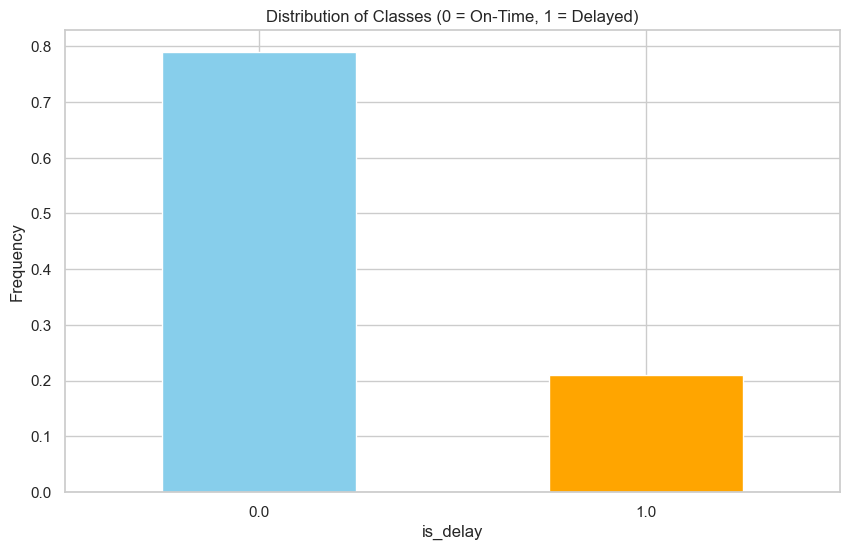

In [31]:
import matplotlib.pyplot as plt

# Plot the distribution of delayed (1) vs. on-time (0) flights
(data.groupby('is_delay').size() / len(data)).plot(kind='bar', color=['skyblue', 'orange'])

plt.ylabel('Frequency')
plt.title('Distribution of Classes (0 = On-Time, 1 = Delayed)')
plt.xticks(rotation=0)
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

From the bar plot above, we can clearly see that the majority of flights in the dataset arrive on time.
Only a smaller portion of flights experience an arrival delay of more than 15 minutes.

Roughly speaking:

About 80% of flights are on time (is_delay = 0)

Around 20% of flights are delayed (is_delay = 1)

This means the dataset is imbalanced, with many more on-time flights than delayed ones.
While this is expected in real-world flight data, it also means that a basic model might just predict “on time” most of the time and still get high accuracy — but it would fail to correctly identify many of the delayed flights.

To handle this imbalance, we’ll need to apply special techniques during model training, such as:

Using class weights (e.g., class_weight='balanced' in classifiers)

Or applying resampling methods like SMOTE or RandomUnderSampler

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

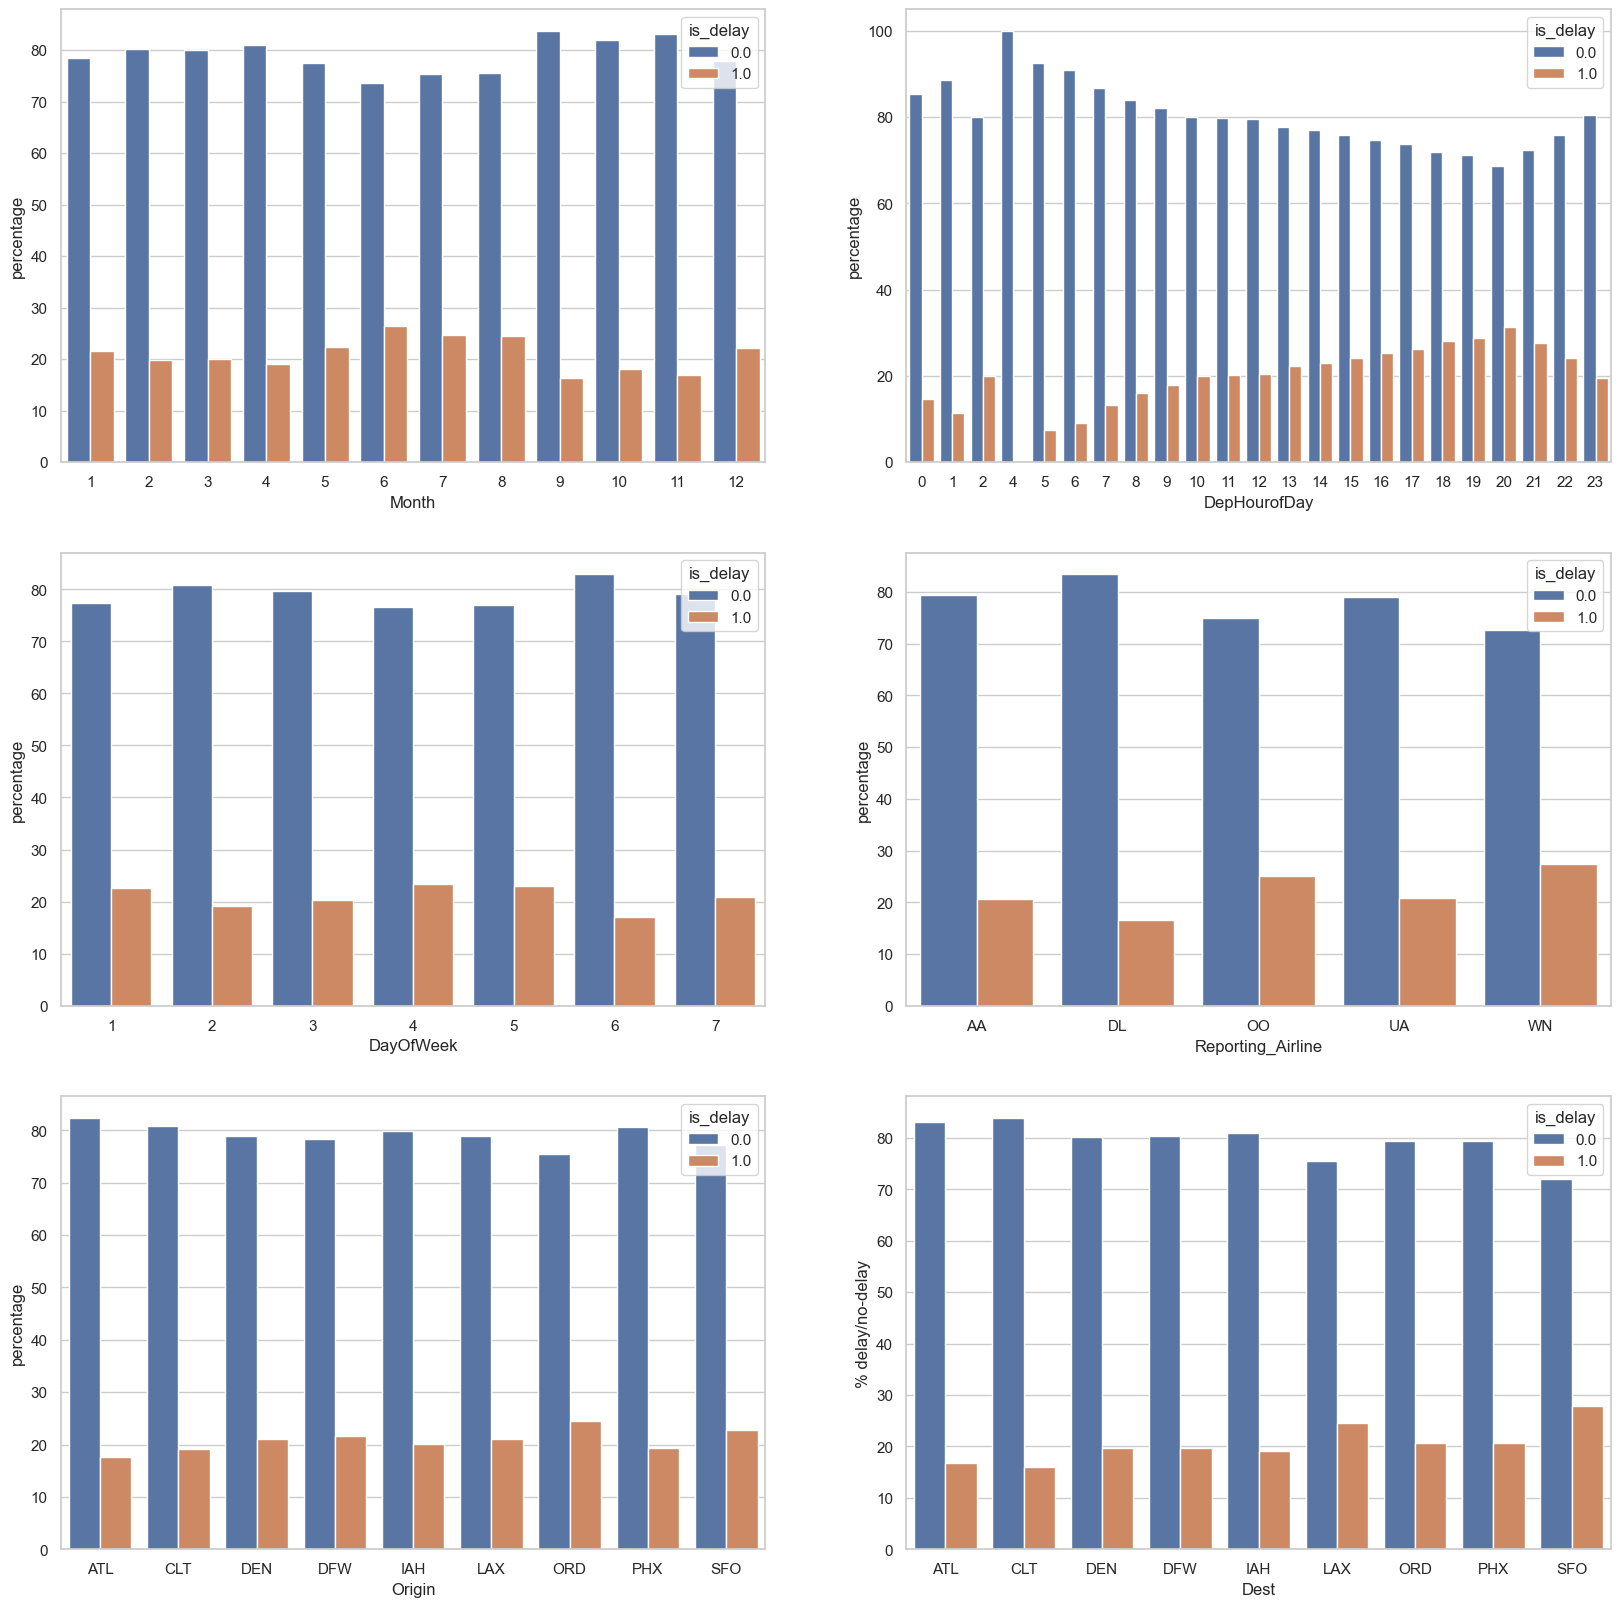

In [32]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

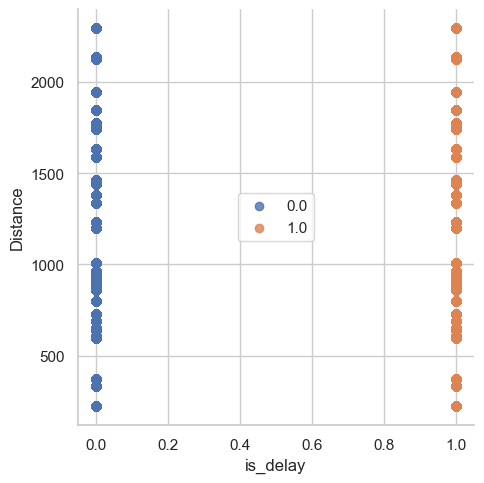

In [33]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

Q. Which months have the most delays?

Ans: From the plot, delays are slightly higher in the summer months (May,June to August) and again in December.
This pattern aligns with the busy travel seasons — summer vacations and the winter holidays — when airports face heavy passenger traffic and weather disruptions.

Q. What time of the day has the most delays?

Ans: Delays tend to increase as the day progresses.
Morning flights (especially between 5 AM to 9 AM) are more likely to depart on time, while late afternoon and evening flights (4 PM to 10 PM) show a higher percentage of delays.
This happens because delays often accumulate throughout the day due to tight schedules and congestion.

Q. What day of the week has the most delays?

Ans: The plots show that Day 4, Day 5, Day 7 and Day 1 Thursday, Friday, Sunday and Monday respectively have a slightly higher proportion of delays compared to other weekdays.
These are peak travel days, with more business and leisure passengers, leading to busier airports and more congestion.

Q. Which airline has the most delays?

Ans: Among the airlines, Southwest (WN) and SkyWest (OO) show relatively higher delay proportions, while Delta (DL) has the lowest delay rate overall.
This suggests that operational efficiency and scheduling strategies vary across carriers.

Q. Which origin and destination airports have the most delays?

Ans: The origin airports ORD (Chicago O’Hare), DEN (Denver), DFW (Dallas-Fort Worth), and SFO tend to have a slightly higher percentage of delays compared to others.
The destination airports SFO, LAX, ORD have higher percentage of delays. These are major hubs that experience high air traffic volume and are often affected by weather variations, leading to more frequent delays.

Q. Is flight distance a factor in the delays?

Ans: From the scatter plot, there’s no clear relationship between flight distance and the likelihood of delay.
Both short-haul and long-haul flights show delays, suggesting that operational and environmental factors (like congestion and weather) have more influence than distance itself.

### Features

Look at all the columns and what their specific types are.

In [34]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [35]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [36]:
# Make a copy of the original dataset
data_orig = data.copy()

# Keep only the required columns
data = data[[ 
    'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
    'Reporting_Airline', 'Origin', 'Dest', 'Distance', 'DepHourofDay'
]]

# Define which columns are categorical
categorical_columns = [
    'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
    'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay'
]

# Convert categorical columns to category dtype
for c in categorical_columns:
    data[c] = data[c].astype('category')

# Verify the changes
print("Updated dataset with categorical columns:")
print(data.dtypes)

Updated dataset with categorical columns:
is_delay              float64
Quarter              category
Month                category
DayofMonth           category
DayOfWeek            category
Reporting_Airline    category
Origin               category
Dest                 category
Distance              float64
DepHourofDay         category
dtype: object


To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [37]:
# Perform one-hot encoding on categorical columns
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

# Concatenate the dummy variables with the main dataset
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical columns
data.drop(categorical_columns, axis=1, inplace=True)

print("One-hot encoding completed successfully!")
print(f"Final dataset shape: {data.shape}")
data.head()

One-hot encoding completed successfully!
Final dataset shape: (1657019, 94)


,is_delay,Distance,Quarter_2,Quarter_3,Quarter_4,Month_2,Month_3,Month_4,Month_5,Month_6,...,DepHourofDay_14,DepHourofDay_15,DepHourofDay_16,DepHourofDay_17,DepHourofDay_18,DepHourofDay_19,DepHourofDay_20,DepHourofDay_21,DepHourofDay_22,DepHourofDay_23
0,0.0,689.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.0,731.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.0,1199.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.0,1587.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0.0,1587.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Check the length of the dataset and the new columnms.

In [40]:
# Enter your code here
# Check number of rows and columns
print(f"Number of rows in dataset: {len(data)}")
print(f"Number of columns in dataset: {len(data.columns)}")

Number of rows in dataset: 1657019
Number of columns in dataset: 94


In [44]:
# Enter your code here
print("\n New columns added after encoding:")
print(data.columns.tolist())


 New columns added after encoding:
['target', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29', 'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA', 'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW', 'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origi

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [43]:
# Rename the target column
data.rename(columns={'is_delay': 'target'}, inplace=True)

# Verify the change
print("Column renamed successfully!")
print(data.columns.tolist()[:10])  # show first 10 columns as a quick check

Column renamed successfully!
['target', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']


In [45]:
# Save the combined dataset to your local computer
output_path = os.path.join(base_path, "combined_csv_v1.csv")
data.to_csv(output_path, index=False)

print(f" Combined CSV file successfully saved at: {output_path}")

 Combined CSV file successfully saved at: C:\Users\prena\Downloads\combined_csv_v1.csv


# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [48]:
# --- Import required function ---
from sklearn.model_selection import train_test_split

# --- Define X (features) and y (target) ---
X = data.drop('target', axis=1)
y = data['target']

# --- Split data into train and test sets (80/20 split) ---
train_data, test_data, train_target, test_target = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(" Data successfully split!")
print(f"Training set: {train_data.shape[0]} samples")
print(f"Testing set: {test_data.shape[0]} samples")

 Data successfully split!
Training set: 1325615 samples
Testing set: 331404 samples


### Baseline classification model

In [62]:
# --- Import libraries ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Initialize model ---
log_reg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

# --- Train the model ---
log_reg.fit(train_data, train_target)

# --- Make predictions ---
y_pred = log_reg.predict(test_data)

# --- Evaluate model ---
accuracy = accuracy_score(test_target, y_pred)
print(f" Baseline Logistic Regression Accuracy: {accuracy:.4f}\n")

# --- Confusion Matrix ---
cm = confusion_matrix(test_target, y_pred)
print("Confusion Matrix:")
print(cm)

# --- Detailed Classification Report ---
print("\nClassification Report:")
print(classification_report(test_target, y_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# --- Compute confusion matrix ---
cm = confusion_matrix(test_target, y_pred)

# --- Compute key metrics ---
accuracy = accuracy_score(test_target, y_pred)
precision = precision_score(test_target, y_pred)
recall = recall_score(test_target, y_pred)                # Sensitivity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])               # True Negative Rate
f1 = f1_score(test_target, y_pred)
auc = roc_auc_score(test_target, y_pred)

# --- Print results nicely ---
print("📊 Model Evaluation Summary (Logistic Regression)")
print("------------------------------------------------")
print(f"Accuracy:     {accuracy:.4f}")
print(f"Precision:    {precision:.4f}")
print(f"Recall:       {recall:.4f} (Sensitivity)")
print(f"Specificity:  {specificity:.4f}")
print(f"F1 Score:     {f1:.4f}")
print(f"AUC Score:    {auc:.4f}")


 Baseline Logistic Regression Accuracy: 0.7896

Confusion Matrix:
[[261460    178]
 [ 69546    220]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    261638
         1.0       0.55      0.00      0.01     69766

    accuracy                           0.79    331404
   macro avg       0.67      0.50      0.44    331404
weighted avg       0.74      0.79      0.70    331404

📊 Model Evaluation Summary (Logistic Regression)
------------------------------------------------
Accuracy:     0.7896
Precision:    0.5528
Recall:       0.0032 (Sensitivity)
Specificity:  0.9993
F1 Score:     0.0063
AUC Score:    0.5012


## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# --- Confusion Matrix Plot ---
def plot_confusion_matrix(test_labels, target_predicted):
    cm = confusion_matrix(test_labels, target_predicted)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Delay (0)', 'Delay (1)'],
                yticklabels=['No Delay (0)', 'Delay (1)'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [64]:
# --- ROC Curve Plot ---
def plot_roc(test_labels, target_predicted):
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, target_predicted)
    auc_score = metrics.roc_auc_score(test_labels, target_predicted)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

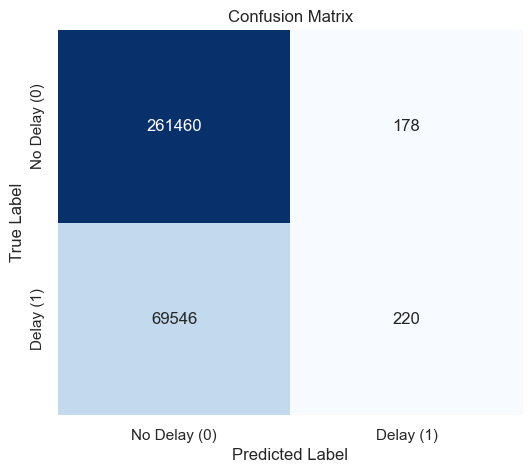

In [65]:
# --- Plot Confusion Matrix ---
plot_confusion_matrix(test_target, y_pred)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

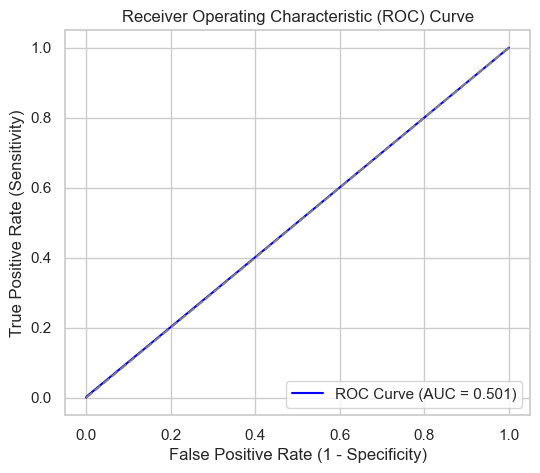

In [66]:
# --- Plot ROC Curve ---
plot_roc(test_target, y_pred)

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


# Confusion Matrix Summary
We can understand that the model performs very well at identifying flights that are not delayed, but it struggles to correctly predict the ones that are delayed.

True Negatives (261,460): Flights correctly predicted as on time.

False Positives (178): Flights predicted as delayed but were actually on time.

False Negatives (69,546): Flights predicted as on time but were actually delayed.

True Positives (220): Flights correctly predicted as delayed.

# Interpretation
At first glance, the model seems accurate (about 79% accuracy), but this is mostly because the majority of flights in the dataset are not delayed.
When we look deeper, the recall (0.3%) and F1-score (0.6%) are extremely low — meaning the model is almost never catching flights that are delayed.

In other words, the model has learned to simply predict “no delay” most of the time, which gives high accuracy but fails to serve the business purpose of identifying potential delays.

# Key Takeaway
The confusion matrix shows a clear imbalance in predictions — the model is biased toward the majority “on-time” class.
To improve performance, future iterations should:

Address class imbalance (e.g., through oversampling or class weighting).

Explore additional features like weather, time of year, and airport congestion.

Experiment with stronger models such as Random Forests or Gradient Boosting to capture non-linear relationships.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitHub repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitHub account, and ensure it is public.


In [ ]:
### Provide a link for your GitHub repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [ ]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### Add indicator variable for holidays
data_orig['is_holiday'] = # Enter your code here 

Weather data was fetched from [this link](https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31).
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [15]:
# download data from the link above and place it into the data folder

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [ ]:
weather = pd.read_csv(<CODE>) # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = # Enter your code here 
weather['airport'] = # Enter your code here 

Create another column called `MONTH` from the `DATE` column.

In [ ]:
weather['MONTH'] = weather[<CODE>].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [ ]:
weather.SNOW.fillna(<CODE>, inplace=True)# Enter your code here
weather.SNWD.fillna(<CODE>, inplace=True)# Enter your code here
weather.isna().sum()

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [ ]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = # Enter your code here 
TMAX_idx = # Enter your code here 
TMIN_idx = # Enter your code here 
TAVG_idx

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [ ]:
weather_impute = weather.groupby([<CODE>]).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute.head(2)

Merge the mean data with the weather data.

In [ ]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [ ]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [ ]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [ ]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [ ]:
sum(data.isna().any())

In [ ]:
data_orig.columns

Convert the categorical data into numerical data using one-hot encoding.

In [ ]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [ ]:
data_dummies = # Enter your code here

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [ ]:
data.columns

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [ ]:
data.rename(columns = {<CODE>:<CODE>}, inplace=True )# Enter your code here

In [16]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B

Create the training and testing sets again.

In [ ]:
# Enter your code here

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [ ]:
# Instantiate another logistic regression model
classifier2 = # Enter your code here

In [ ]:
# Enter your code here

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?

In [17]:
# Enter answer here and turn the cell type into markdown


# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [19]:
# copy the link here

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

In [18]:
# write your answers here